In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymatreader as reader
import matplotlib.pyplot as plt 

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = reader.read_mat('04cars.mat')

In [3]:
dataset = data['X']

In [4]:
dataset.shape # according to the problem the data set should have been 387 x 11 ; but the dimensions i get is 387 x 18 ? 

(387, 18)

we have to eliminate the binary features from the data and use only the continuous ones ! 

In [5]:
dataset = dataset[:, 7:]

In [6]:
from sklearn.preprocessing import StandardScaler

clf = StandardScaler()

dataset = clf.fit_transform(dataset)

In [7]:
df = pd.DataFrame(dataset)

In [8]:
df.head() # sample of the dataset with only the continuous features !

,0,1,2,3,4,5,6,7,8,9,10
0,0.534227,0.479546,0.367827,0.163207,0.150424,-0.440043,-0.579806,0.492905,1.100421,0.910587,0.215077
1,0.653268,0.596226,0.367827,0.163207,0.150424,-0.440043,-0.579806,0.511342,1.100421,0.910587,0.215077
2,0.188527,0.162006,0.367827,0.163207,0.720452,-0.630319,-0.757467,1.302729,-0.171233,0.305483,1.701415
3,2.869863,2.770849,0.071678,0.163207,1.076720,-0.630319,-0.579806,-0.538168,-1.019003,-0.829085,-0.082190
4,-0.477746,-0.485493,-1.112919,-1.180648,-0.205843,0.701611,0.663816,-1.070014,-0.877708,-0.980361,-0.973993


<AxesSubplot:>

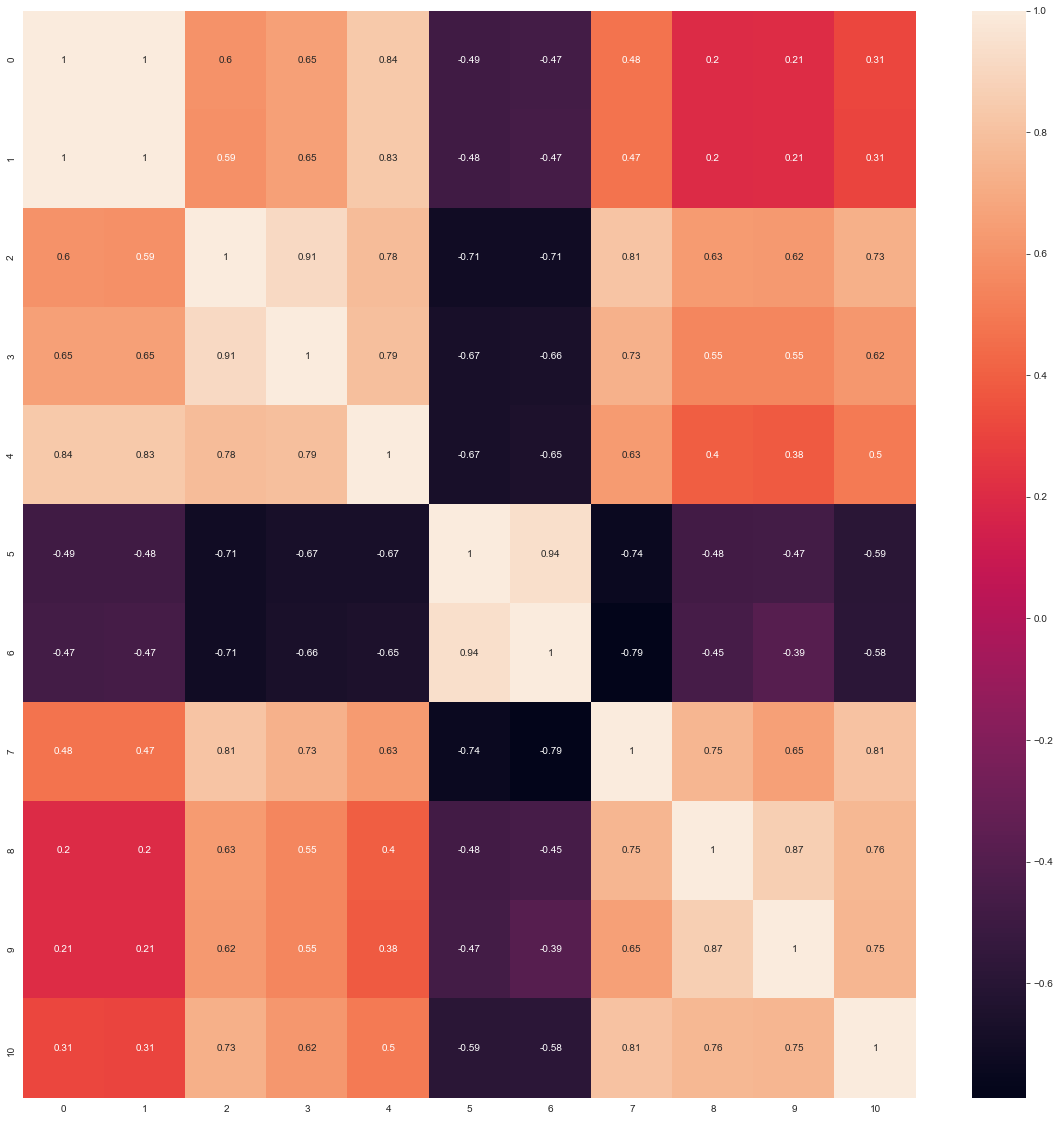

In [9]:
# displaying the correlation matrix for the dataset in the form of a heatmap

plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True)

now we will install the factor-analyzer using the command pip install factor-analyzer

pip install factor-analyzer

In [10]:
from factor_analyzer import FactorAnalyzer

In [11]:
fa = FactorAnalyzer(n_factors=2, rotation= None, method='ml')

In [12]:
fa.fit(df)

FactorAnalyzer(method='ml', n_factors=2, rotation=None, rotation_kwargs={})

In [13]:
fa.loadings_

array([[ 0.99817207, -0.02702386],
       [ 0.99798499, -0.0324945 ],
       [ 0.61881979,  0.68211508],
       [ 0.67173823,  0.5697813 ],
       [ 0.8454547 ,  0.31727597],
       [-0.50359486, -0.6058315 ],
       [-0.48802359, -0.61639105],
       [ 0.49735253,  0.77083305],
       [ 0.22584507,  0.78318666],
       [ 0.22922968,  0.7367635 ],
       [ 0.33264851,  0.78884397]])

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1. Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influence on the variable.

In [14]:
fa.get_communalities()

array([0.99707777, 0.99702993, 0.84821892, 0.77588299, 0.81545769,
       0.62063959, 0.61810495, 0.84154313, 0.66438734, 0.5953667 ,
       0.73292984])

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

In [15]:
reduced_set = fa.transform(df)

In [16]:
reduced_set # the array of scores.

array([[ 5.09063462e-01,  2.96135108e-01],
       [ 6.23571723e-01,  2.21709541e-01],
       [ 2.02546817e-01,  8.49970083e-01],
       [ 2.74734424e+00, -2.02721661e+00],
       [-5.07491658e-01, -9.48884124e-01],
       [ 7.16751722e-03,  1.91465459e-01],
       [-3.36988852e-01, -5.02590347e-01],
       [-4.05003718e-01, -6.79523860e-01],
       [ 8.99350103e-02, -8.44095817e-01],
       [ 4.44043693e-01, -3.31337492e-01],
       [-8.02042842e-02, -1.50660884e-01],
       [ 4.46186709e-03, -7.51494051e-02],
       [ 5.84723508e-02, -9.63169039e-02],
       [ 5.39122235e-01, -2.49769320e-01],
       [ 4.74109602e-01, -8.72075725e-02],
       [ 1.59284981e-01, -1.37769809e-02],
       [ 3.76870832e-01,  9.23130943e-02],
       [ 3.16654191e-01,  7.23499721e-02],
       [ 8.43961721e-01,  4.36169374e-01],
       [ 1.87802271e+00,  4.22384356e-01],
       [ 8.20651017e-01,  3.07328850e-01],
       [ 7.70601201e-01,  3.32085297e-01],
       [ 2.59035742e+00, -1.47819136e-01],
       [ 8.

No handles with labels found to put in legend.


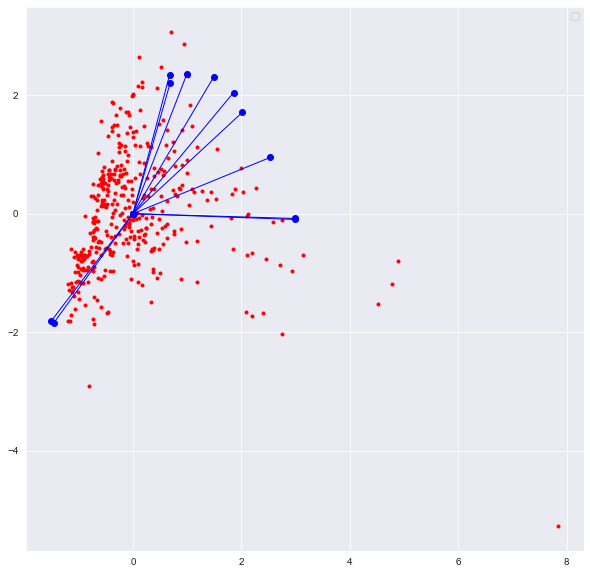

In [17]:
plt.figure(figsize=(10,10))

plt.scatter(reduced_set[:,0], reduced_set[:,1],c=['r'], marker='.')

for i in range(11):
    
    plt.plot([0,3*fa.loadings_[i][0]], [0, 3*fa.loadings_[i][1]], '-bo',linewidth=1 )
    
plt.legend()    

this is the required bi-plot ; as i could not add the labels as python didn't support it and showed errors ; but the blue lines have the same label as that in the murphy example on cars dataset ; moreover this method doesnt scale the scores in the range (-1,1) so that is missing but the graph is the anyhow :) 

Factor analysis is a technique that is used to reduce a large number of variables into fewer numbers of factors.  This technique extracts maximum common variance from all variables and puts them into a common score.  As an index of all variables, we can use this score for further analysis. 

Factor loading is basically the correlation coefficient for the variable and factor.  Factor loading shows the variance explained by the variable on that particular factor.  In the SEM approach, as a rule of thumb, 0.7 or higher factor loading represents that the factor extracts sufficient variance from that variable.

The factor score is also called the component score.  This score is of all row and columns, which can be used as an index of all variables and can be used for further analysis.  We can standardize this score by multiplying a common term.  With this factor score, whatever analysis we will do, we will assume that all variables will behave as factor scores and will move.